## PROPOSTA 1   
- Realizar a análise e limpeza dos dados;   
- Busca por sazonalidades;   
- Capacidade de geração por regiões;   
- Realizar possíveis predições.   

Abaixo uma pequena amostra do dataset:

### Libraries Import 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import urllib.request
sns.set(color_codes = True)
%matplotlib inline

In [38]:
import urllib.request
try:
  urllib.request.urlretrieve("https://raw.githubusercontent.com/jdcneto/Data_Analysis/main/dataset/file_02.csv?token=ATRDOG3IN7JIBLJXWRUSH5TBMCJ6C", "file_02.csv")
except:
    print('Error')

In [39]:
df = pd.read_csv('file_02.csv')
df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


### Missing Data Searching

In [41]:
pd.isna(df).sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

### Handle with Missing Data

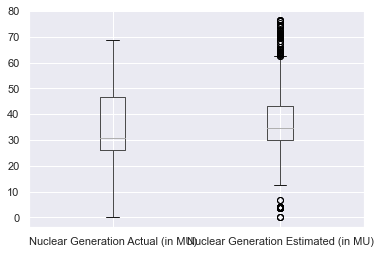

In [42]:
boxplot = df.boxplot(column = ['Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)'])

In [43]:
# Replacing missing values for its mean
df.fillna(df['Nuclear Generation Actual (in MU)'].mean(), inplace=True)
df.fillna(df['Nuclear Generation Estimated (in MU)'].mean(), inplace=True)

# Checking missing values again
pd.isna(df).sum()

index                                   0
Date                                    0
Region                                  0
Thermal Generation Actual (in MU)       0
Thermal Generation Estimated (in MU)    0
Nuclear Generation Actual (in MU)       0
Nuclear Generation Estimated (in MU)    0
Hydro Generation Actual (in MU)         0
Hydro Generation Estimated (in MU)      0
dtype: int64